<div style="
    border: 2px solid #0056A1;
    border-radius: 10px;
    padding: 10px 20px;
    max-width: 100%;
    margin: auto;
    color: #ddd;
    font-family: Arial, sans-serif;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3);
    transition: transform 0.3s ease;
    ">
    
<h1 style="
    color: #0056A1;
    text-align: center;
    font-size: 2.5em;
    margin: 5px 0;
    font-family: 'Arial', sans-serif;
    transition: color 0.3s ease;
    ">
    <span onmouseover="this.style.color='#FFA500'" onmouseout="this.style.color='#0056A1'">Patria & Co.</span>
</h1>

<h2 style="
    color: #0056A1;
    text-align: center;
    font-size: 2em;
    margin: 5px 0;
    font-family: 'Arial', sans-serif;
    font-weight: bold;
    transition: color 0.3s ease;
    ">
    <span onmouseover="this.style.color='#FFA500'" onmouseout="this.style.color='#0056A1'">Predictive Maintenance</span>
</h2>

<h4 style="
    text-align: center;
    font-size: 1.2em;
    color: #bbb;
    margin: 5px 0;
    font-family: 'Arial', sans-serif;">
    <span onmouseover="this.style.color='#66ccff'" onmouseout="this.style.color='#bbb'">Cliste Rekayasa Indonesia</span>
</h4>

<h4 style="
    text-align: center;
    font-size: 1.2em;
    color: #bbb;
    margin: 5px 0;
    font-family: 'Arial', sans-serif;">
    <span onmouseover="this.style.color='#66ccff'" onmouseout="this.style.color='#bbb'">Dr. Harry Patria</span>
</h4>

<p style="
    text-align: center;
    font-size: 1.1em;
    color: #aaa;
    font-style: italic;
    margin: 5px 0;">
    <span onmouseover="this.style.color='#66ccff'" onmouseout="this.style.color='#aaa'">December 2024</span>
</p>

<hr style="
    border-top: 1px solid #0056A1;
    margin: 10px 0;">
</div>


![](https://j.gifs.com/76kDrQ.gif)

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [30]:
import matplotlib
matplotlib.rcParams.update({'font.size': 10})

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
# Load the data
df = pd.read_csv('predictive_maintenance.csv')
df = df.drop(["UDI","Product ID"],axis=1)

In [5]:
## Converting temperature in centigrate from Kelvin [1 K = -272.15 °C  ] 
df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [6]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
9808,M,26.05,36.85,1441,44.2,147,0,No Failure,10.8
4730,L,31.15,39.55,1508,35.5,217,0,No Failure,8.4
6635,L,29.35,38.35,1534,39.3,119,0,No Failure,9.0
4811,M,31.25,39.85,1748,28.4,200,0,No Failure,8.6
4450,L,30.35,38.15,1551,37.3,168,0,No Failure,7.8


In [7]:
display(df.shape)
display(df.size)

(10000, 9)

90000

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Air temperature [°C]         10000 non-null  float64
 2   Process temperature [°C]     10000 non-null  float64
 3   Rotational speed [rpm]       10000 non-null  int64  
 4   Torque [Nm]                  10000 non-null  float64
 5   Tool wear [min]              10000 non-null  int64  
 6   Target                       10000 non-null  int64  
 7   Failure Type                 10000 non-null  object 
 8   Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.2+ KB


In [9]:
df.describe()

,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [°C]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


### Exploratory Data Analysis

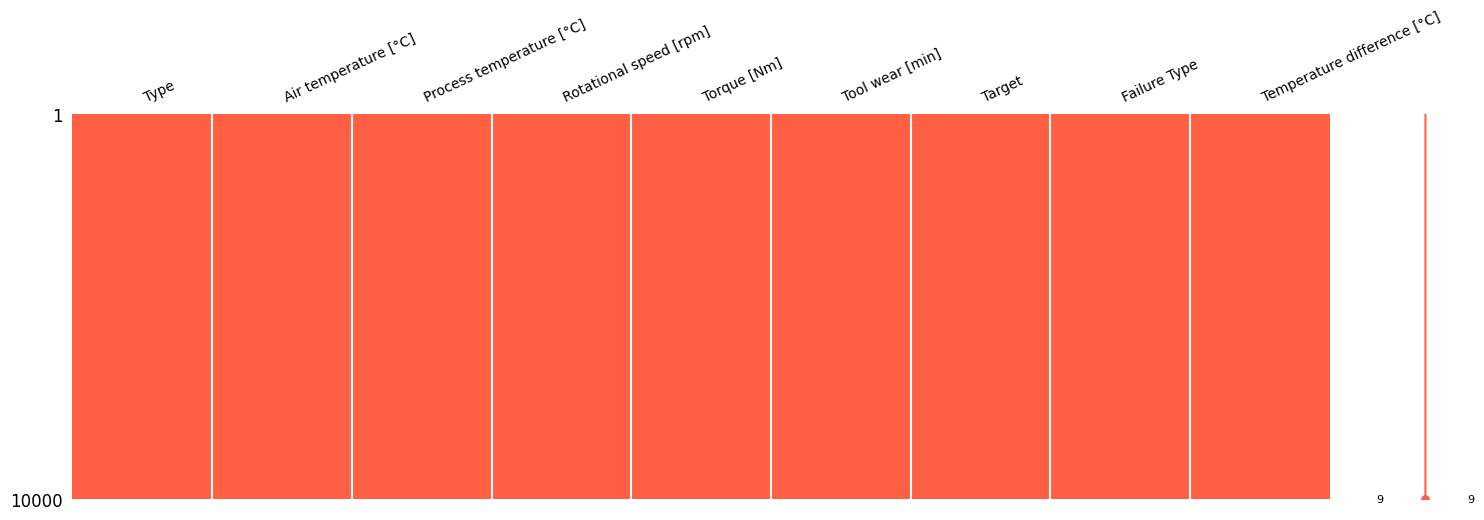

In [31]:
#pip install missingno
import missingno as msno
msno.matrix(df, figsize=(18,5), fontsize=10, color=(1, 0.38, 0.27));
plt.xticks(rotation=25);

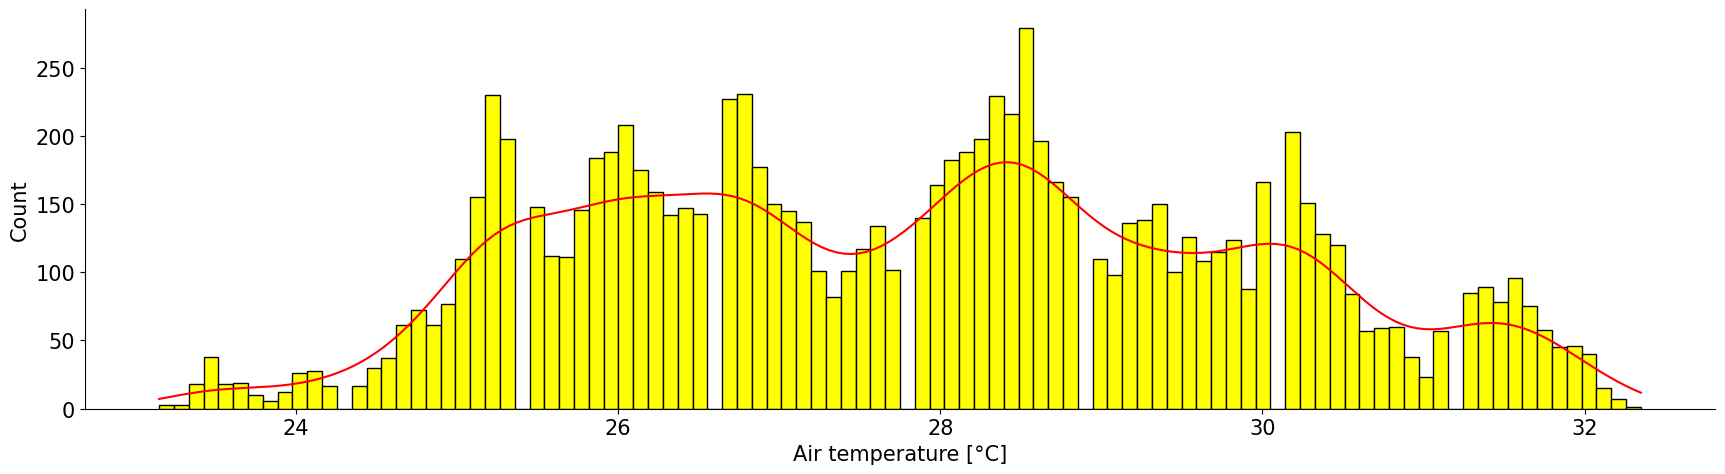

In [11]:
sns.displot(data=df, x="Air temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "yellow",height = 5, aspect = 3.5);

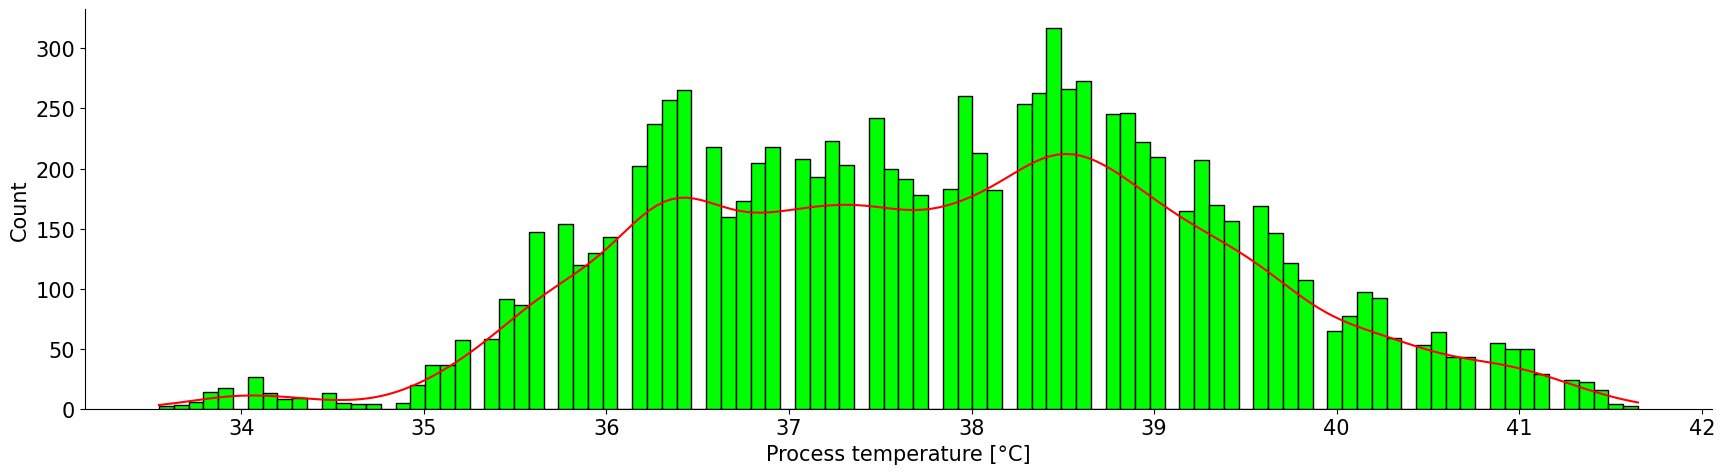

In [12]:
sns.displot(data=df, x="Process temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "lime",height = 5, aspect = 3.5);

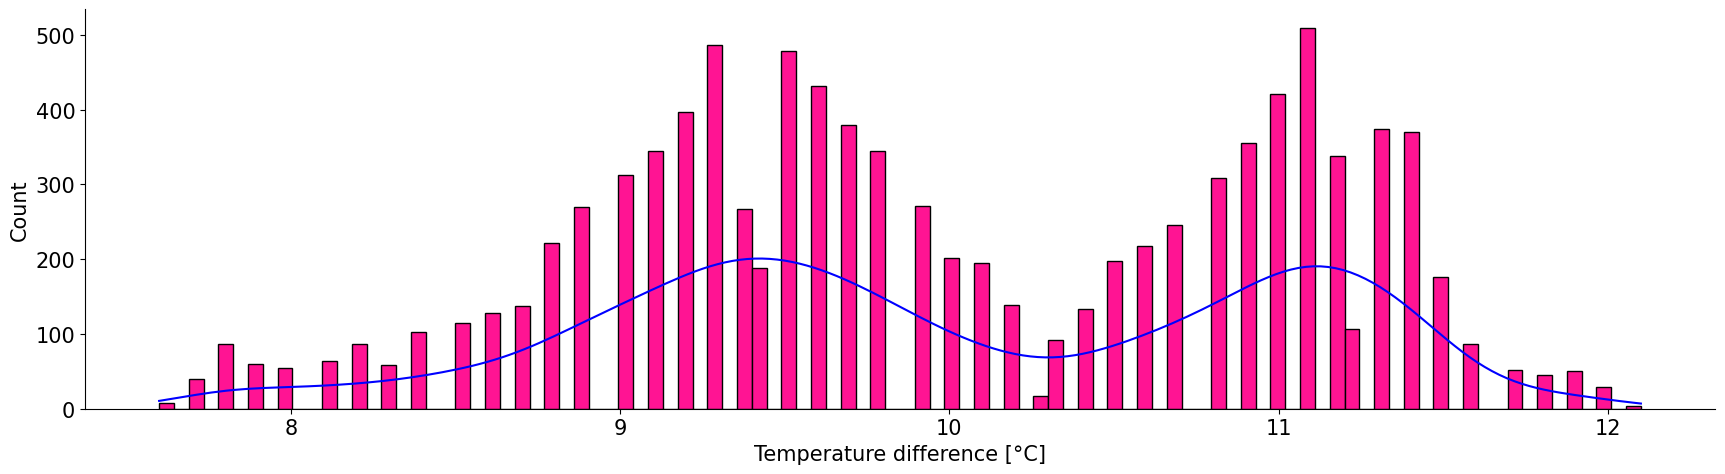

In [13]:
sns.displot(data=df, x="Temperature difference [°C]", kde=True, bins = 100,color = "blue", facecolor = "DeepPink",height = 5, aspect = 3.5);

In [14]:
for col in df[['Type','Target','Failure Type']]:
    print(df[col].value_counts()) 
    print("****"*8)

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
********************************
Target
0    9661
1     339
Name: count, dtype: int64
********************************
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64
********************************


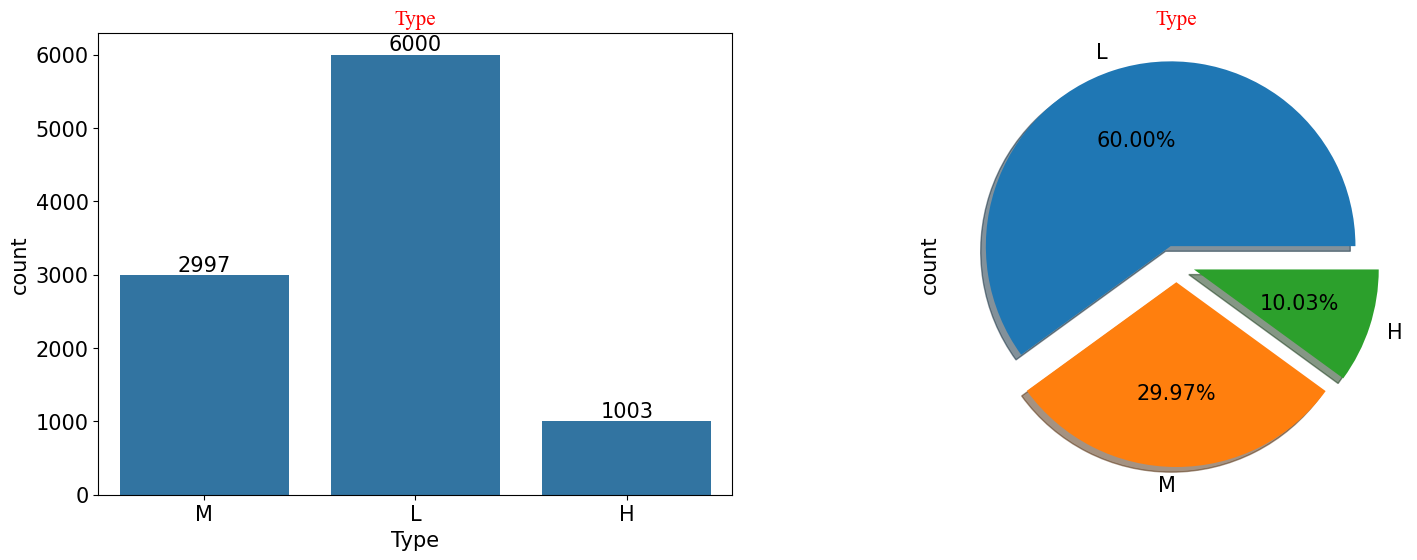

In [15]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type", fontsize = 20,color='Red',font='Times New Roman');

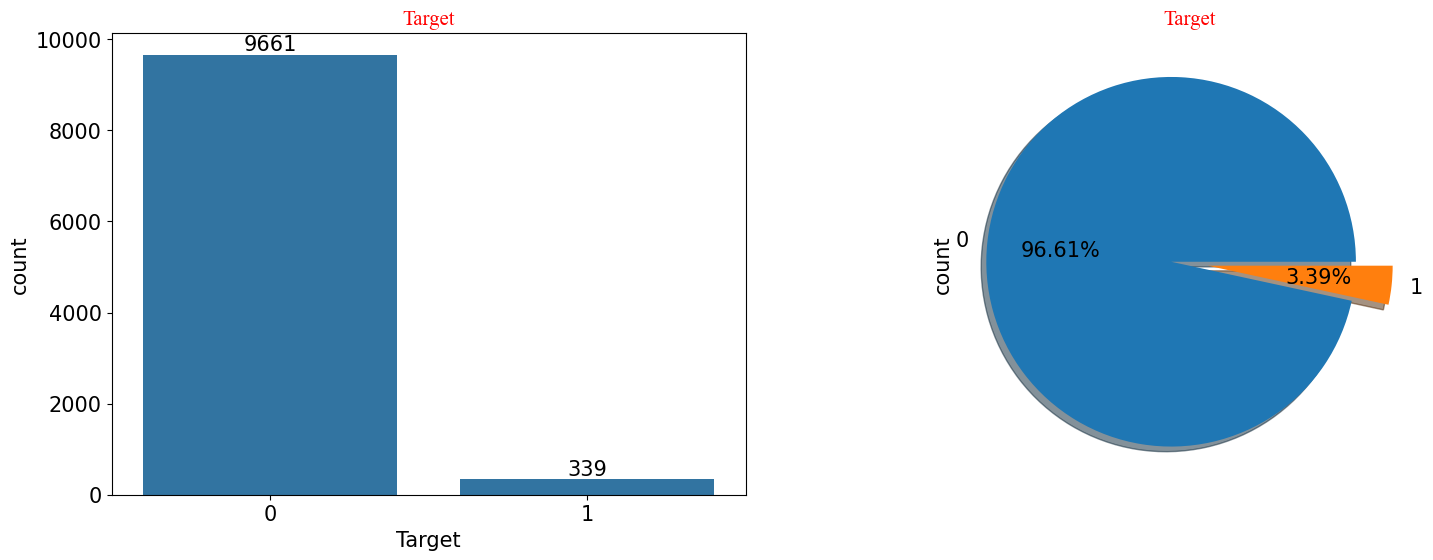

In [16]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df)
ax.bar_label(ax.containers[0])
plt.title("Target", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Target", fontsize = 20,color='Red',font='Times New Roman');

In [17]:
df.head(2)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5


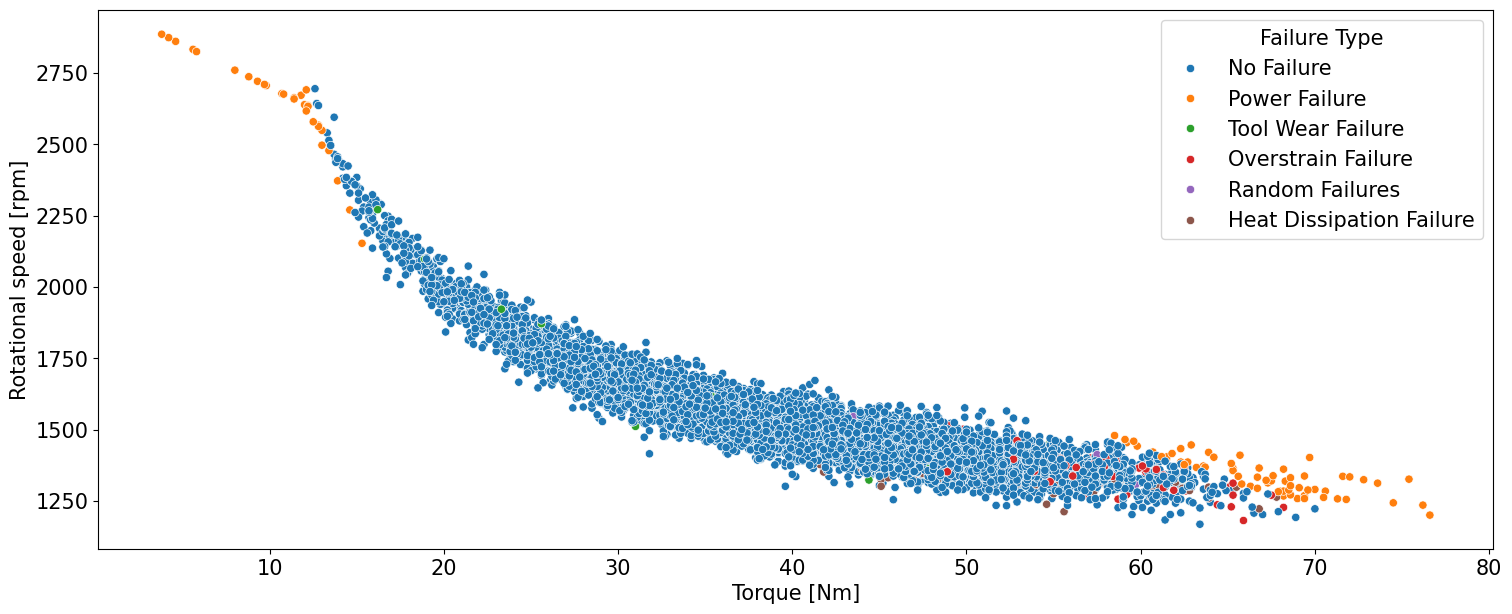

In [18]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="tab10");

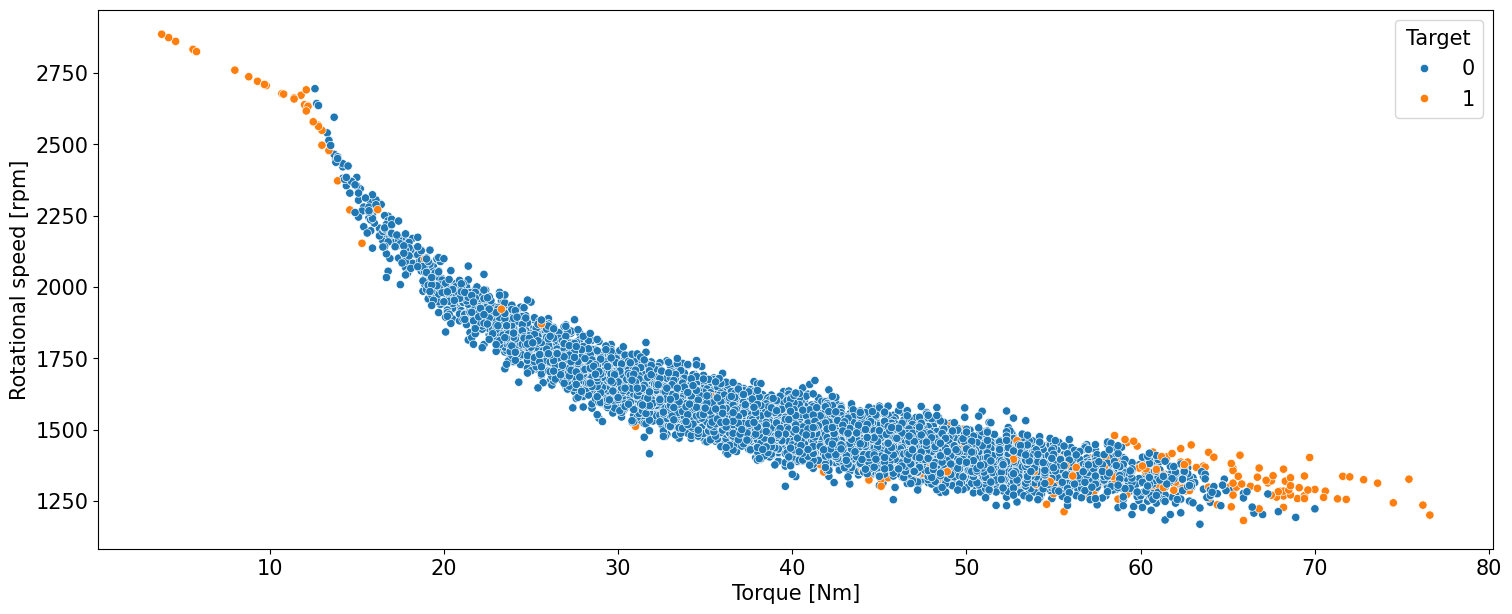

In [19]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="tab10");

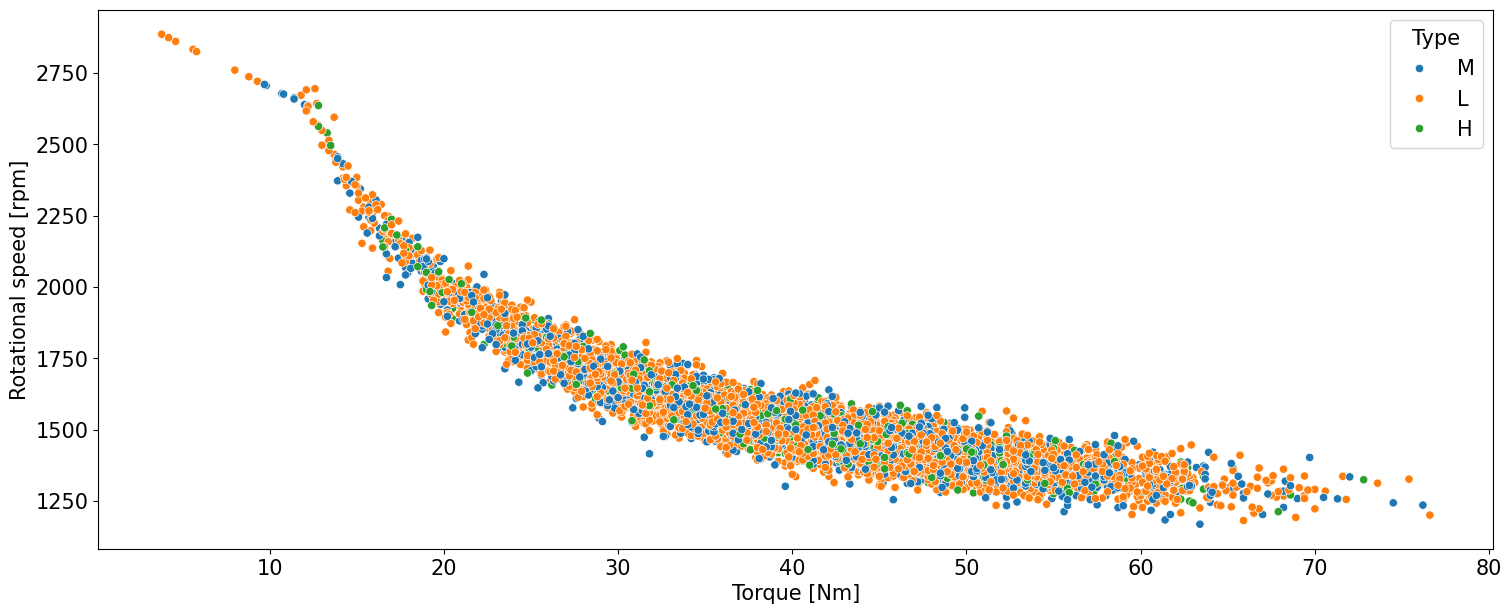

In [20]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="tab10");

In [21]:
df.head(2)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5


In [22]:
#plt.figure(figsize = (15, 6))
#plt.grid()
#sns.swarmplot(df["Torque [Nm]"], df["Failure Type"], hue = df["Failure Type"]);

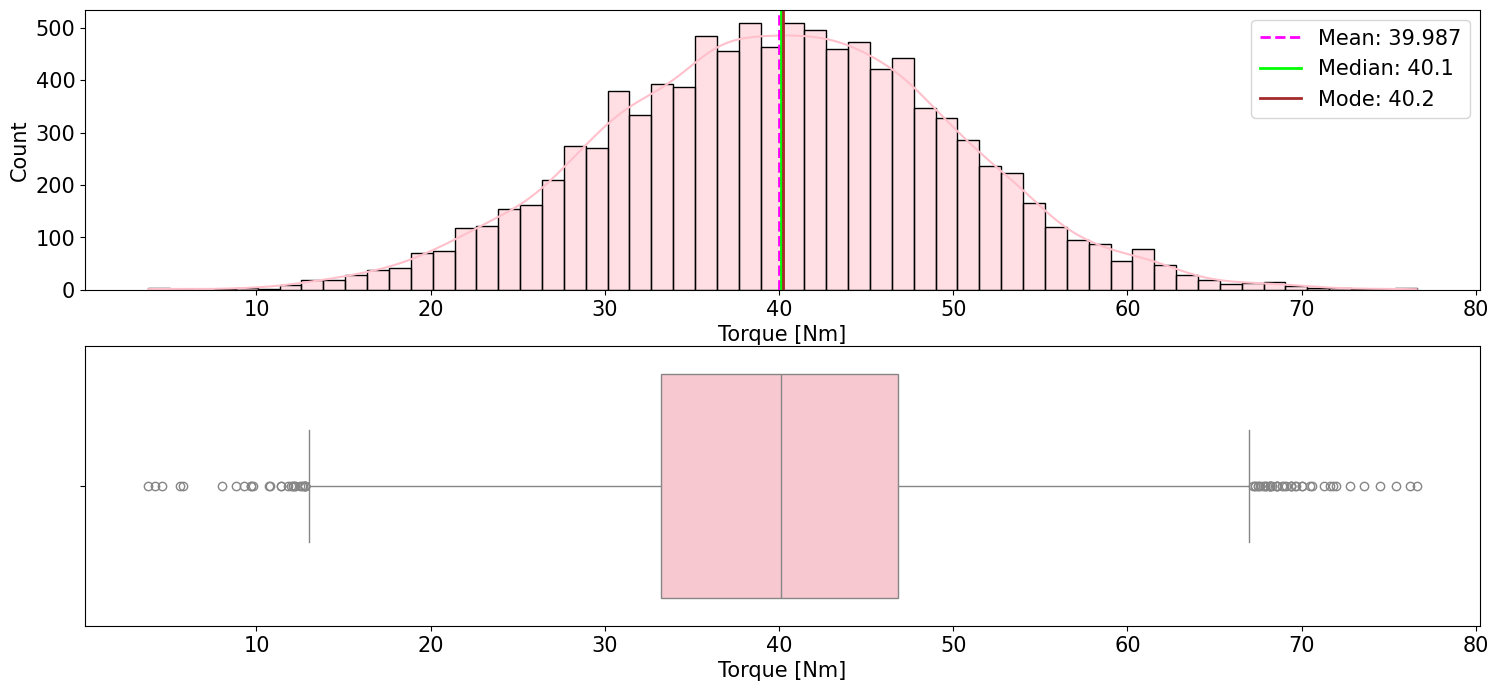

In [23]:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='pink')

    ax[0].axvline(x = df[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='pink')
    
    plt.show()

plot_hist('Torque [Nm]')

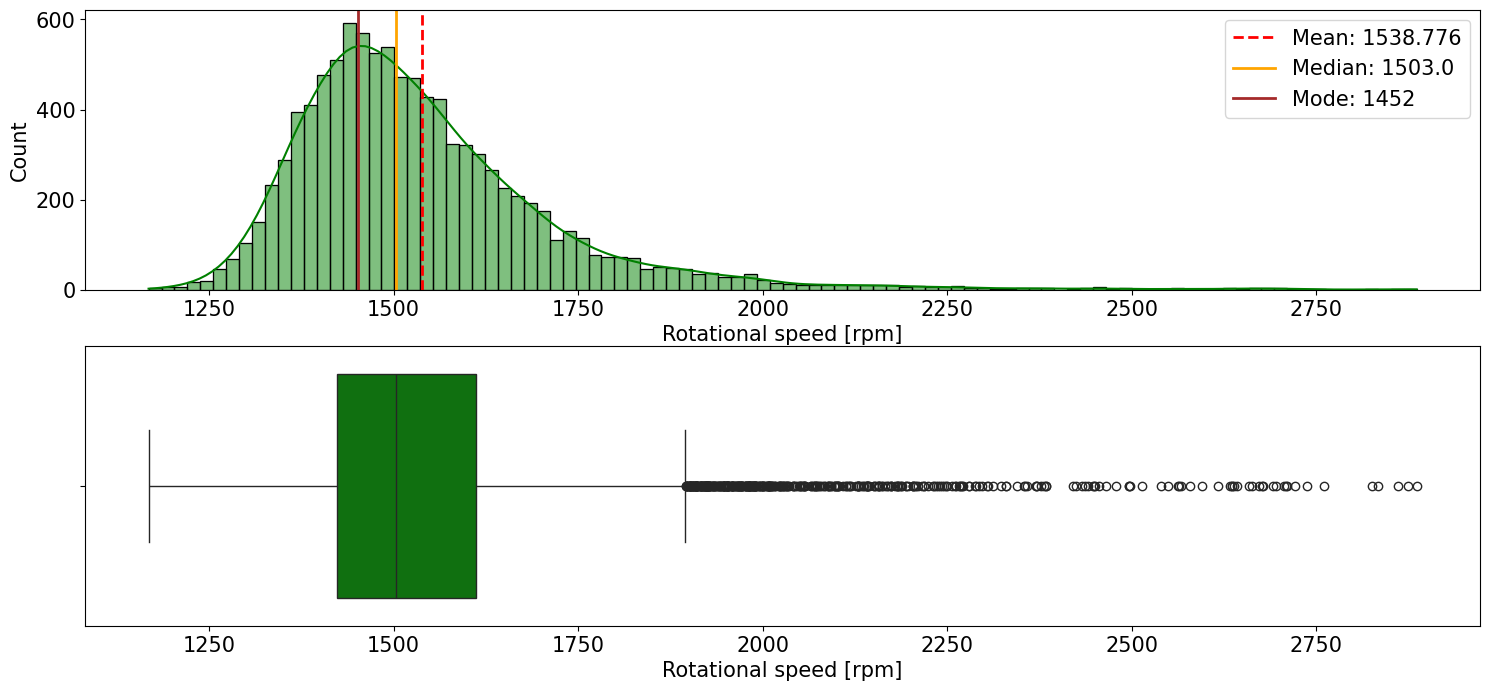

In [24]:
def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='green')

    ax[0].axvline(x = df[feature].mean(), color = 'red', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'orange', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='green')
    
    plt.show()

plot_hist('Rotational speed [rpm]')

In [25]:
# sns.pairplot(df,hue = "Failure Type");

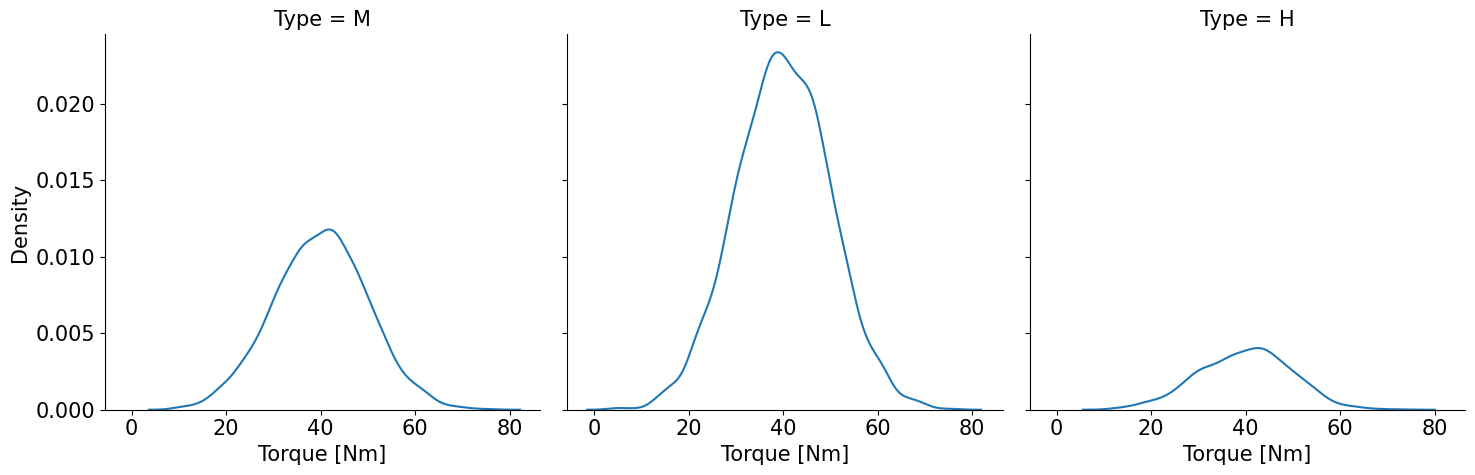

In [26]:
sns.displot(data=df, x="Torque [Nm]", col="Type", kind="kde");

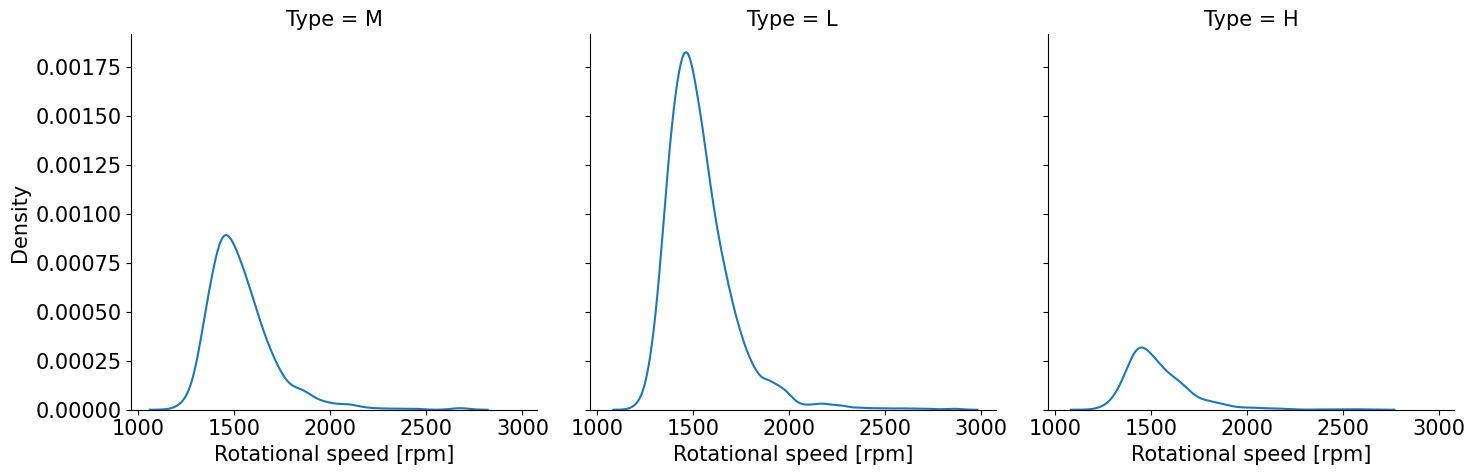

In [27]:
sns.displot(data=df, x="Rotational speed [rpm]", col="Type", kind="kde");

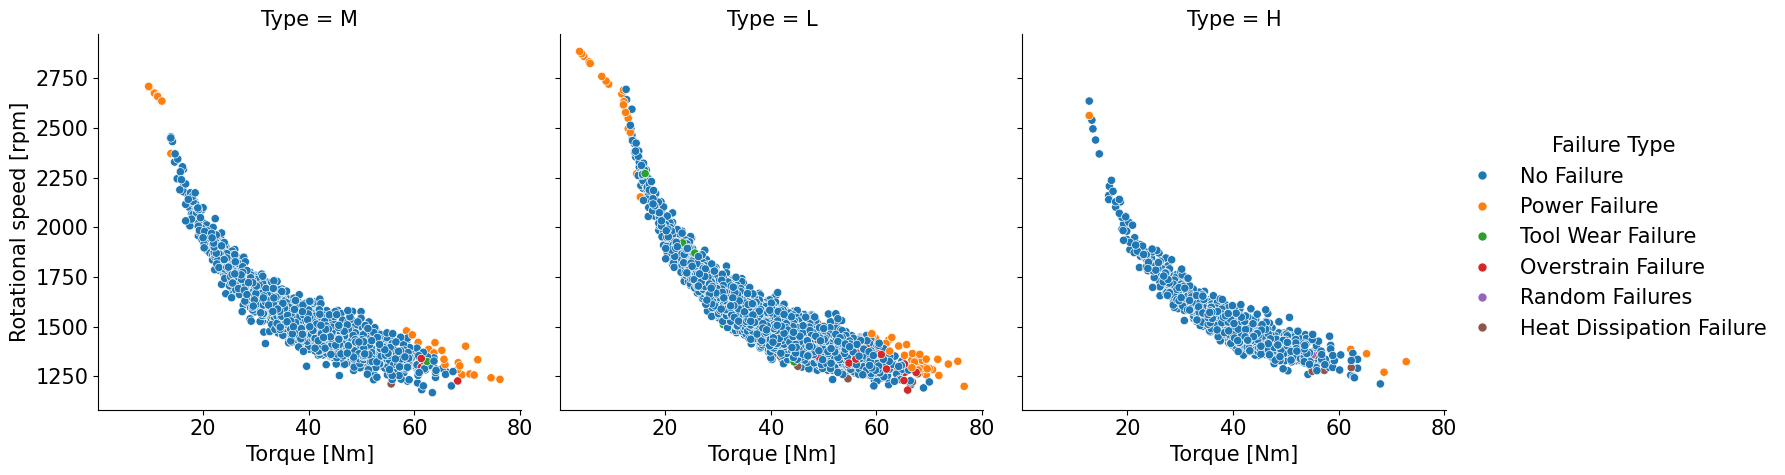

In [28]:
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='tab10');

<font color="Lime" size=+3 face="Comic Sans MS"><div style="text-align: justify"> Feature Selection </font>

In [33]:
pip install category-encoders

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.9 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.9 MB 3.5 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.9 MB 3.6 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.9 MB 3.5 MB/s eta 0:00:03
   ------------- -------------------------- 3.4/9.9 MB 3.4 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.9 MB 3.4 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.9 MB 3.4 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.9 MB 3.4 MB/s eta 0:00:02
   ------------------------- -------------- 6.3/9.9 MB 3.4 MB/s eta 0:00:02
   ---------------------------- ----------- 7.1/9.9 MB 3.4 MB/s eta 0:00:01
   -------------------------------- ------- 8.1/9.9 MB 3.5 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.9 MB 3.6 MB/s eta 0:00:01
   ----------------

In [35]:
#pip install category-encoders
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(2)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,0,1,10.5
1,2,26.05,36.55,1408,46.3,3,0,1,10.5


In [42]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

In [43]:
X = df.drop(columns="Failure Type" , axis=1)
y = df["Failure Type"]

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

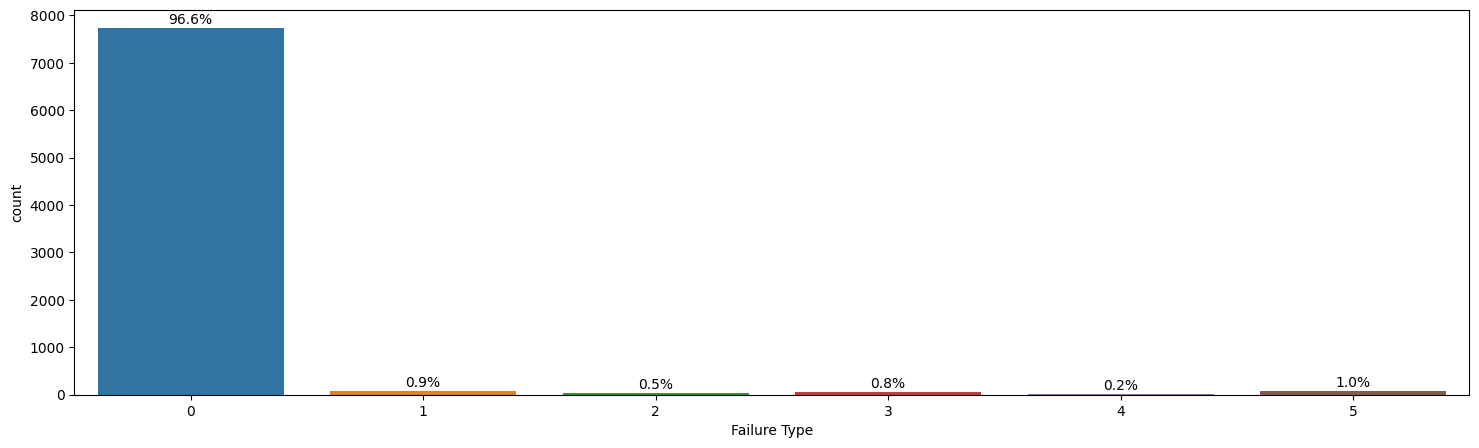

In [45]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_train, palette = 'tab10')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

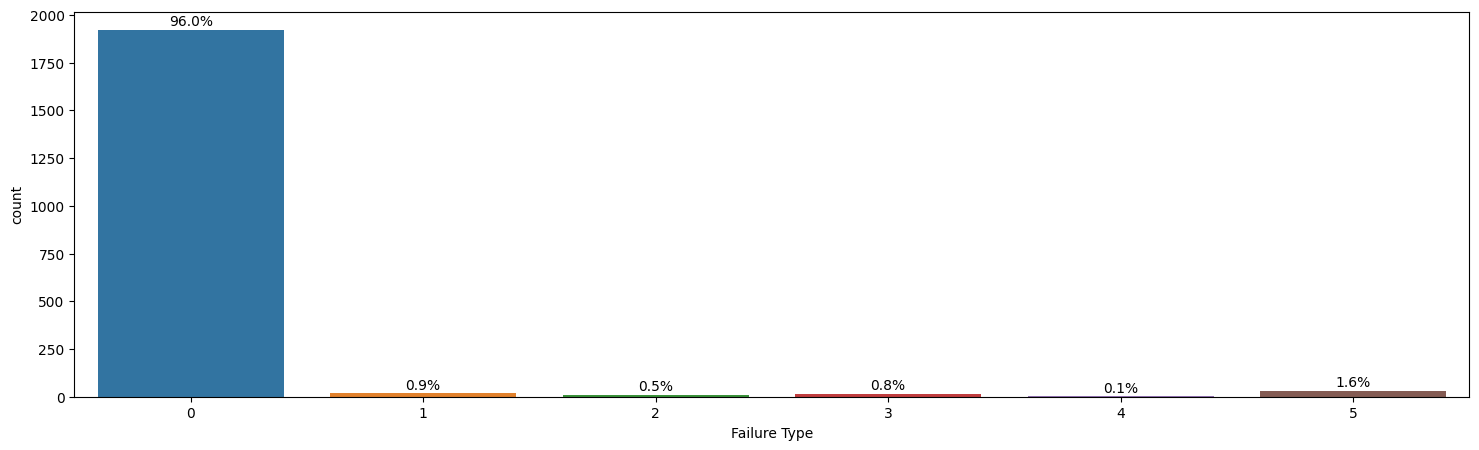

In [46]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_test, palette = 'tab10')
t= len(y_test)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

### Logistic Regression

In [55]:
import sklearn
print(sklearn.__version__)

1.5.2


Training Accuracy    : 98.38 %
Model Accuracy Score : 98.45 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1921
           1       0.83      0.79      0.81        19
           2       1.00      0.11      0.20         9
           3       0.92      0.75      0.83        16
           4       0.00      0.00      0.00         3
           5       0.96      0.69      0.80        32

    accuracy                           0.98      2000
   macro avg       0.78      0.56      0.61      2000
weighted avg       0.98      0.98      0.98      2000

--------------------------------------------------------


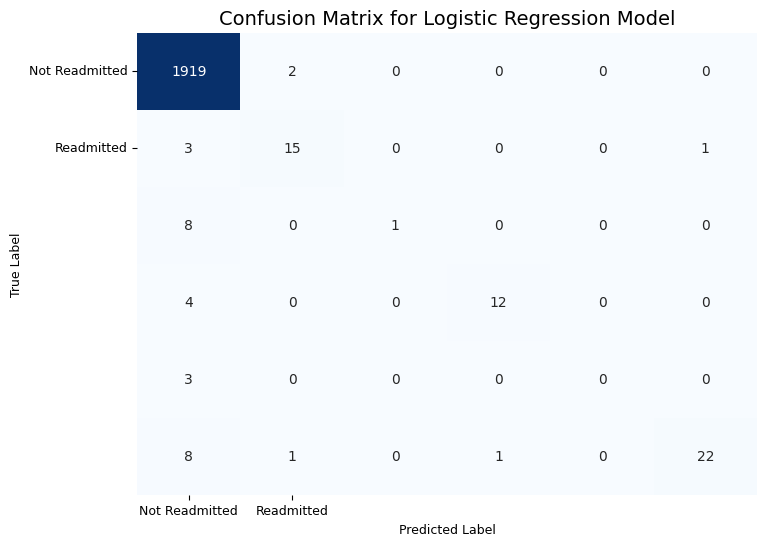

In [67]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

# Calculate accuracy
log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

# Print results
print("Training Accuracy    :", log_train, "%")
print("Model Accuracy Score :", log_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix manually using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Not Readmitted", "Readmitted"], 
            yticklabels=["Not Readmitted", "Readmitted"])
plt.title("Confusion Matrix for Logistic Regression Model", fontsize=14)
plt.xlabel("Predicted Label", fontsize=9)
plt.ylabel("True Label", fontsize=9)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(False)
plt.show()